# Homework Week 3

## Data loading and preparation

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df_original = pd.read_csv("housing.csv")

In [127]:
df_original.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [128]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
df = df_original[features]

In [129]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [130]:
df = df.fillna(0)

In [131]:
df['rooms_per_household'] = df.total_rooms / df.households
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
df['population_per_household'] = df.population / df.households

##  Question 1

In [132]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

It looks like <1H OCEAN is the most frequent observation.

In [133]:
df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

## Split the data

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
len(df_full_train), len(df_test)

(16512, 4128)

In [136]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_test), len(df_val)

(12384, 4128, 4128)

In [137]:
df_train = df_train.reset_index(drop=True)
df_val = df_train.reset_index(drop=True)
df_test = df_train.reset_index(drop=True)

In [138]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [139]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 2

In [140]:
numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

X_train[numerical].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925005,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
latitude,-0.925005,1.000000,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
housing_median_age,-0.099812,0.002477,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,0.036449,-0.025914,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,0.063840,-0.059730,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,0.091670,-0.100272,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,0.049762,-0.063529,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.016426,-0.076805,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,-0.034814,0.119118,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,0.102320,-0.124507,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


Text(0.5, 1.0, 'Correlation between Variables in df')

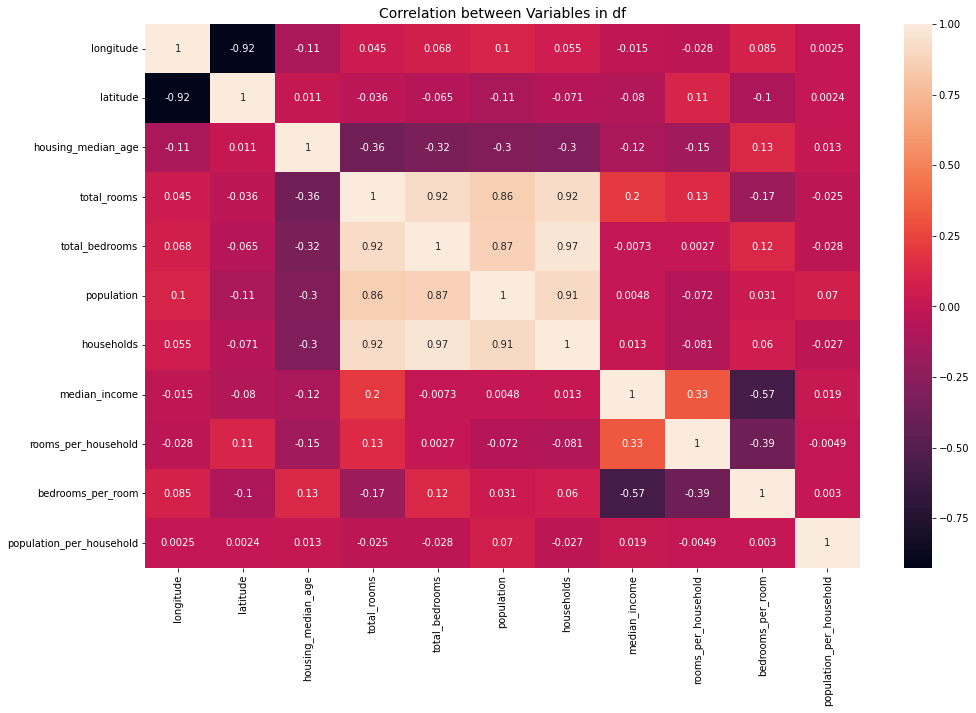

In [141]:
plt.figure(figsize=(16,10))
sns.heatmap(df[numerical].corr(),annot=True, fmt='.2g')
plt.title('Correlation between Variables in df', fontsize=14)

**total_bedrooms and households** seem to have the biggest correlation

## Question 3

In [142]:
above_average = (y_train > y_train.mean()).astype(int)
above_average

array([1, 1, 0, ..., 1, 0, 0])

In [143]:
from sklearn.metrics import mutual_info_score

score = mutual_info_score(X_train.ocean_proximity, above_average)
round(score, 2)

0.1

## Question 4

One hot encoding of the categorical feature ocean_proximity

In [144]:
from sklearn.feature_extraction import DictVectorizer

In [145]:
dv = DictVectorizer(sparse=False)

In [150]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

In [151]:
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

y_train = (y_train > y_train.mean()).astype(int)
y_val = (y_val > y_train.mean()).astype(int)

Fitting the logistic regression model

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
soft_pred = model.predict_proba(X_val)[:,1]
y_pred = (soft_pred >= 0.5).astype(int)
y_pred, y_val

(array([0, 1, 0, ..., 0, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]))

In [155]:
score = (y_pred == y_val).mean()

0.39752906976744184

## Question 5